***Jeyshinee Pyneeandee, April 2024*** <br>
## ISIS Metadata Reading Accuracy QA (ISIS A & B)
This script is to manually test the accuracy of KERAS for its metadata reading. The script tests ISIS A and ISIS B ionograms separately. 

In [2]:
#required imports
import matplotlib.pyplot as plt
import os
from random import randrange
import csv
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import warnings
warnings.filterwarnings("ignore")

In [3]:
rootDir = 'L:/DATA/ISIS/'

imageDir1 = rootDir + 'ISIS_101300030772/'
imageDir2 = rootDir + 'ISIS_102000056114/'
imageDir3 = rootDir + 'raw_upload_20230421/'

logDir = rootDir + 'ISIS_Test_Metadata_Analysis/MERGED/'

In [3]:
sample_size = 50

We first read the ISIS 1 master file as a dataframe.

In [4]:
df_master_ISIS_1 = pd.read_csv(logDir + 'ISIS-1_MD_Version6.csv', low_memory= False)

In [5]:
df_master_ISIS_1

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
0,NaN,4,1971,61,16,50,30,Image0002.png,b10_R014207713,B1-34-61 ISIS A C-918,...,3,70,1,"Kashima, Japan",KER,70,35.57,140.39,35.6N,140.4E
1,NaN,4,1971,61,16,50,59,Image0003.png,b10_R014207713,B1-34-61 ISIS A C-918,...,3,70,1,"Kashima, Japan",KER,70,35.57,140.39,35.6N,140.4E
2,NaN,4,1971,61,16,51,28,Image0004.png,b10_R014207713,B1-34-61 ISIS A C-918,...,3,70,1,"Kashima, Japan",KER,70,35.57,140.39,35.6N,140.4E
3,NaN,4,1971,61,16,51,57,Image0005.png,b10_R014207713,B1-34-61 ISIS A C-918,...,3,70,1,"Kashima, Japan",KER,70,35.57,140.39,35.6N,140.4E
4,NaN,4,1971,61,16,52,26,Image0006.png,b10_R014207713,B1-34-61 ISIS A C-918,...,3,70,1,"Kashima, Japan",KER,70,35.57,140.39,35.6N,140.4E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308072,NaN,1,1972,244,10,44,50,Image0570.png,R014207899,B1-35-9 ISIS A C-1659,...,3,79,0,"Bretigny, France",BRET,79,48.36,2.21,48N,2E
308073,NaN,1,1972,244,10,45,19,Image0571.png,R014207899,B1-35-9 ISIS A C-1659,...,3,79,1,"Bretigny, France",BRET,79,48.36,2.21,48N,2E
308074,NaN,1,1972,244,10,45,48,Image0572.png,R014207899,B1-35-9 ISIS A C-1659,...,3,79,1,"Bretigny, France",BRET,79,48.36,2.21,48N,2E
308075,NaN,1,1972,244,10,46,16,Image0573.png,R014207899,B1-35-9 ISIS A C-1659,...,3,79,1,"Bretigny, France",BRET,79,48.36,2.21,48N,2E


## ISIS A Ionograms

We will randomly sample 100 ISIS A ionograms from the master results file to test accuracy. Before that, we filter for metadata read with a time quality of 1,2 or 3. <br>
Note: 2 samples of 50 ionograms each are taken.

In [7]:
time_quality = [1,2,3]
results_file = df_master_ISIS_1.loc[df_master_ISIS_1['Time_quality'].isin(time_quality)]

In [146]:
selected_rows_num = results_file.sample(sample_size)
selected_rows_num.head(5)

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
176932,NaN,2,1973,205,15,13,15,Image0354.png,R014207708,B1-35-13 ISIS A C-1882,...,3,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
266695,NaN,2,1970,104,4,37,58,Image0168.png,b23_R014207876,B1-34-63 ISIS A C-1067,...,3,21,1,"Orroral, Australia",ORR,21,-35.37,148.57,35.6S,149E
190053,NaN,4,1972,305,14,1,25,Image0012.png,R014207899,B1-35-9 ISIS A C-1662,...,3,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
10735,NaN,3,1971,255,11,55,31,Image0106.png,b13_R014207853,B1-35-11 ISIS A C-1787,...,3,69,1,"Tromso, Norway",TRO,69,69.39,18.56,69.7N,18.9E
40537,NaN,2,1970,228,23,6,23,Image0175.png,b10_R014207713,B1-34-61 ISIS A C-951,...,3,8,1,"Santiago, Chile",AGO,8,-33.08,289.19,33.2S,70.1W


In [8]:
#additional sample of 50 
second_sample_A = results_file.sample(sample_size)
second_sample_A.head(5)

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
291738,NaN,1,1970,322,9,33,59,Image0100.png,R014207849,B1-35-6 ISIS A C-1466,...,3,37,1,"Kauai, Hawaii",HAW,37,22.08,200.20,22.1N,159.7W
168341,NaN,1,1970,329,5,7,0,Image0281.png,b33_R014207877,B1-34-64 ISIS A C-1123,...,3,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
160354,NaN,4,1970,229,21,1,16,Image0344.png,b33_R014207877,B1-34-64 ISIS A C-1103,...,3,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
43168,NaN,7,1972,90,3,21,7,Image0469.png,b15_R014207728,B1-35-10 ISIS A C-1705,...,3,8,1,"Santiago, Chile",AGO,8,-33.08,289.19,33.2S,70.1W
104910,NaN,1,1969,199,17,2,52,Image0123.png,R014207888,B1-34-52 ISIS A C-404,...,3,43,1,"Resolute Bay, Canada",RES,43,74.41,265.07,74.7N,95W


In [14]:
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)

    
    if os.path.exists(image_path1):
        print ("Image Path:", image_path1)
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        print ("Image Path:", image_path2)
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):
        print ("Image Path:", image_path3)
        image = Image.open(image_path3)
        image.show()
    else: 
        print ("Image not found")


Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207708\B1-35-13 ISIS A C-1882\Image0354.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b23_R014207876\B1-34-63 ISIS A C-1067\Image0168.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207899\B1-35-9 ISIS A C-1662\Image0012.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b13_R014207853\B1-35-11 ISIS A C-1787\Image0106.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b10_R014207713\B1-34-61 ISIS A C-951\Image0175.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b13_R014207853\B1-35-11 ISIS A C-1801\Image0159.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b33_R014207877\B1-34-64 ISIS A C-1116\Image0239.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207888\B1-34-52 ISIS A C-382\Image0729.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207854\B1-35-12 ISIS A C-1842\Image0169.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b34_R014207854\B1-35-12 ISIS A C-1861\Image0225.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207888\B1-34-52 ISIS A

In [17]:
for _, row in second_sample_A.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)
    
    if os.path.exists(image_path1):
        print ("Image Path:", image_path1)
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        print ("Image Path:", image_path2)
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):        
        print ("Image Path:", image_path3)
        image = Image.open(image_path3)
        image.show()
    else: 
        print ("Image not found")

Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207849\B1-35-6 ISIS A C-1466\Image0100.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b33_R014207877\B1-34-64 ISIS A C-1123\Image0281.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b33_R014207877\B1-34-64 ISIS A C-1103\Image0344.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b15_R014207728\B1-35-10 ISIS A C-1705\Image0469.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207888\B1-34-52 ISIS A C-404\Image0123.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b24_R014207706\B1-35-4 ISIS A C-1378\Image0328.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b23_R014207876\B1-34-63 ISIS A C-1092\Image0445.png
Image Path: L:/DATA/ISIS/raw_upload_20230421/R014207848\B1-35-7 ISIS A C-1575\Image0274.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b13_R014207853\B1-35-11 ISIS A C-1813\Image0110.png
Image Path: L:/DATA/ISIS/raw_upload_20230421/R014207848\B1-35-7 ISIS A C-1561\Image0122.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b24_R014207706\B1-35-4 I

In [18]:
print ("Please read the metadata for each of the 50 images above and the values in the boxes below")
print ("Write N/A if any of the values were not present or not easy to read.")

second_data = []
for _, row in second_sample_A.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']  

    Station_Number = input ("Station number: ")
    Year = input ("Add the Year: ")
    Day = input ("Add the Day: ")
    Hour = input ("Add the Hour: ")
    Minute = input ("Add the Minutes: ")
    Second = input ("Add the Seconds: ")
    Issue = ''

    if str(row['Year'])[2:4] != Year:
        Issue = 'Year'
    if row['Day'] != int(Day):
        Issue = Issue + ', Day'
    if row['Minute'] !=  int(Minute):
        Issue = Issue + ', Minute'
    if row['Second'] != int(Second):
        Issue = Issue + ', Second'  
    if row['Adjusted_Station_Number'] != int(Station_Number):
        Issue = Issue + ', Station_Number'
    
    if len(Issue) == 0:
        Issue = 'None'
    second_data.append([directory, subdirectory, filename, Station_Number, Year, Day, Hour, Minute, Second, Issue])
    
with open ('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Filtered.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "Filename","Station_Number","Year", "Day",  "Hour", "Minute", "Second", "Issue"])
    for row in second_data:
        writer.writerow(row)

Please read the metadata for each of the 50 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.


ISIS metadata was read per value and not per digit. To get a better analysis of the accuracy of metadata read, we separate the values per single digits and evaluate accuracy.

In [5]:
my_analysis_A = pd.read_csv("L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Filtered.csv")
my_analysis_A

,Directory,Subdirectory,Filename,Station_Number,Year,Day,Hour,Minute,Second,Issue
0,R014207708,B1-35-13 ISIS A C-1882,Image0354.png,50,73,205,15,13,16,Second
1,b23_R014207876,B1-34-63 ISIS A C-1067,Image0168.png,21,70,104,4,37,58,NaN
2,R014207899,B1-35-9 ISIS A C-1662,Image0012.png,50,72,305,14,1,25,NaN
3,b13_R014207853,B1-35-11 ISIS A C-1787,Image0106.png,69,71,255,11,59,31,Minute
4,b10_R014207713,B1-34-61 ISIS A C-951,Image0175.png,8,70,228,23,6,23,NaN
...,...,...,...,...,...,...,...,...,...,...
95,R014207854,B1-35-12 ISIS A C-1841,Image0088.png,74,72,233,15,30,57,NaN
96,b15_R014207728,B1-35-10 ISIS A C-1700,Image0451.png,50,73,35,3,14,19,", Second"
97,R014207854,B1-35-12 ISIS A C-1841,Image0054.png,74,72,233,3,37,28,NaN
98,b7_R014207896,B1-34-50 ISIS A C-312-21,Image0374.png,21,69,99,10,4,12,", Day"


In [6]:
#separating df into issues and no-issues
my_analysis_A['Issue'] = my_analysis_A['Issue'].astype(str)
no_issues_A = my_analysis_A.loc[(my_analysis_A['Issue'] == 'nan')]
no_issues_A

,Directory,Subdirectory,Filename,Station_Number,Year,Day,Hour,Minute,Second,Issue
1,b23_R014207876,B1-34-63 ISIS A C-1067,Image0168.png,21,70,104,4,37,58,nan
2,R014207899,B1-35-9 ISIS A C-1662,Image0012.png,50,72,305,14,1,25,nan
4,b10_R014207713,B1-34-61 ISIS A C-951,Image0175.png,8,70,228,23,6,23,nan
5,b13_R014207853,B1-35-11 ISIS A C-1801,Image0159.png,69,71,357,0,45,10,nan
6,b33_R014207877,B1-34-64 ISIS A C-1116,Image0239.png,50,70,310,2,49,55,nan
...,...,...,...,...,...,...,...,...,...,...
93,b24_R014207706,B1-35-4 ISIS A C-1367,Image0305.png,50,71,328,1,53,2,nan
94,b27_R014207898,B1-35-8 ISIS A C-1617,Image0205.png,16,72,24,14,12,20,nan
95,R014207854,B1-35-12 ISIS A C-1841,Image0088.png,74,72,233,15,30,57,nan
97,R014207854,B1-35-12 ISIS A C-1841,Image0054.png,74,72,233,3,37,28,nan


In [102]:
no_issues_A.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Single_Vals.csv')

In [7]:
my_analysis_A['Issue'] = my_analysis_A['Issue'].astype(str)
issues_A = my_analysis_A.loc[(my_analysis_A['Issue'] != 'nan')]
issues_A = issues_A.reset_index(drop=True)
issues_A.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Single_Vals_Issues.csv')

In [8]:
#getting original keras values to manually compare for difference
for _, row in issues_A.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row['Filename']
    print(df_master_ISIS_1.loc[(df_master_ISIS_1["Directory"] == str(directory)) & (df_master_ISIS_1["Subdirectory"] == str(subdirectory)) & (df_master_ISIS_1["Filename"] == str(filename))])

       Outlier  Fixed_Frequency_Code  Year  Day  Hour  Minute  Second  \
176932     NaN                     2  1973  205    15      13      15   

             Filename   Directory            Subdirectory  ...  \
176932  Image0354.png  R014207708  B1-35-13 ISIS A C-1882  ...   

        Adjusted_Satellite_Code Adjusted_Station_Number  Station_quality  \
176932                        3                      50                1   

        Station_Location_y  Station_ID_y Number Station_Latitude  \
176932     Ottawa, Canada            OTT     50            45.21   

        Station_Longitude  Latitude  Longitude  
176932             284.07     45.4N      75.7W  

[1 rows x 22 columns]
      Outlier  Fixed_Frequency_Code  Year  Day  Hour  Minute  Second  \
10735     NaN                     3  1971  255    11      55      31   

            Filename       Directory            Subdirectory  ...  \
10735  Image0106.png  b13_R014207853  B1-35-11 ISIS A C-1787  ...   

       Adjusted_Satellite

Once the differences were noted, we manually change the issues column to specify which digit was incorrectly read by KERAS. Then, we split the values into single digits. e.g. Year becomes Year_1 and Year_2. This is done for Station_Number, Year, Day, Hour, Minute,and Second.

In [118]:
#splitting values into single digits. e.g. Year becomes Year_1 and Year_2
issues_A = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Single_Vals.csv')

issues_A = issues_A.reset_index(drop=True)
for int in range(len(issues_A)):
    issues_A.loc[int, "Year_1"] = str(issues_A.loc[int, "Year"])[0]
    issues_A.loc[int, "Year_2"] = str(issues_A.loc[int, "Year"])[1]
    issues_A = issues_A.reset_index(drop=True)
    
for int in range(len(issues_A)):
    pos =  str(issues_A.loc[int, "Day"])
    if len(pos) == 3:
        issues_A.loc[int, 'Day_1'] = pos[0]
        issues_A.loc[int, 'Day_2'] = pos[1]
        issues_A.loc[int, 'Day_3'] = pos[2]

    elif len(pos) == 2:
        issues_A.loc[int, 'Day_1'] = '0'
        issues_A.loc[int, 'Day_2'] = pos[0]
        issues_A.loc[int, 'Day_3'] = pos[1]
    else:
        issues_A.loc[int, 'Day_1'] = '0'
        issues_A.loc[int, 'Day_2'] = '0'
        issues_A.loc[int, 'Day_3'] = pos[0]

issues_A = issues_A.reset_index(drop=True)
for int in range(len(issues_A)):
    pos =  str(issues_A.loc[int, "Hour"])
    if len(pos) == 2:
        issues_A.loc[int, 'Hour_1'] = pos[0]
        issues_A.loc[int, 'Hour_2'] = pos[1]

    else:
        issues_A.loc[int, 'Hour_1'] = '0'
        issues_A.loc[int, 'Hour_2'] = pos[0]

issues_A = issues_A.reset_index(drop=True)
for int in range(len(issues_A)):
    pos =  str(issues_A.loc[int, "Minute"])
    if len(pos) == 2:
        issues_A.loc[int, 'Minute_1'] = pos[0]
        issues_A.loc[int, 'Minute_2'] = pos[1]

    else:
        issues_A.loc[int, 'Minute_1'] = '0'
        issues_A.loc[int, 'Minute_2'] = pos[0]
        
issues_A = issues_A.reset_index(drop=True)
for int in range(len(issues_A)):
    pos =  str(issues_A.loc[int, "Second"])
    if len(pos) == 2:
        issues_A.loc[int, 'Second_1'] = pos[0]
        issues_A.loc[int, 'Second_2'] = pos[1]

    else:
        issues_A.loc[int, 'Second_1'] = '0'
        issues_A.loc[int, 'Second_2'] = pos[0]

issues_A = issues_A.reset_index(drop=True)
for int in range(len(issues_A)):
    pos =  str(issues_A.loc[int, "Station_Number"])
    if len(pos) == 2:
        issues_A.loc[int, 'Station_1'] = pos[0]
        issues_A.loc[int, 'Station_2'] = pos[1]

    else:
        issues_A.loc[int, 'Station_1'] = '0'
        issues_A.loc[int, 'Station_2'] = pos[0]

issues_A.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Single_Vals.csv')


In [9]:
def analyze_batch(path):
    df_num = pd.read_csv(path)
    total = len(df_num)    
    print ('Element Analysis:')
    
    categorical_columns =["Station_1","Station_2","Year_1", "Year_2", "Day_1", "Day_2", "Day_3" ,"Hour_1","Hour_2", "Minute_1", "Minute_2", "Second_1", "Second_2"]
    column_sums = {}
    accuracy_data = []
    z_score = 1.96 #norm.ppf(1-(1-confidence_level)/2)

    for column in categorical_columns:
        issue_counts_num = df_num["Issue"].value_counts()
        matches = [word for word in issue_counts_num.index if column in word]
        col_sum = total - (sum(issue_counts_num[matches]))            
        column_sums[column] = col_sum
        p = col_sum / total
        accuracy_percent = p*100
        sample_error = np.sqrt(p*(1-p)/total)*100
        confidence_interval = z_score*sample_error
        
        print(f'Number of "{column}" element categorized correctly:' , col_sum)
        print (f'Percent reading accuracy of the "{column}" element: {accuracy_percent:.2f}%')
        print (f'Sample Error for "{column}" element: {sample_error:.2f}')
        print (f'Confidence Interval for the "{column}" element: {confidence_interval:.2f}')
        
        accuracy_data.append ((column, accuracy_percent,sample_error, confidence_interval))
        
   
    #plotting
    fig = plt.figure(figsize = (10, 5))
    categories, accuracies,sample_error, confidence_interval  = zip(*accuracy_data) 
    bar = plt.bar (categories, accuracies, color = '#2C74BE', edgecolor = '#2C74BE', alpha = 0.7)
    lower_error = np.zeros_like(sample_error)
    error_bar = plt.errorbar(categories, accuracies, yerr = (lower_error, confidence_interval), 
                         linestyle = '', capsize = 10, ecolor = 'black', elinewidth = 2,
                         markeredgewidth = 2)
    plt.ylim(70, 107)

    plt.title (f"% Reading accuracy of the metadata elements", fontweight = 'bold')
    plt.xlabel(f"Metadata elements", fontweight = 'bold')
    plt.ylabel(f"Reading Accuracy (%)", fontweight = 'bold')
    plt.xticks(rotation=90)
    plt.yticks (np.arange(70, 107, step = 10))
    #creating a legend
    legend_handles = [bar[0], error_bar]
    legend_labels = ['% Reading Accuracy', 'Sample Error with 95% Confidence Interval (CI)']
    plt.legend(legend_handles, legend_labels, loc = 'lower left', prop = {'weight':'bold'})

    #adding numbers on top of the error bars and bars
    for i, (bar_height, err_height, conf_interval) in enumerate (zip(accuracies, sample_error, confidence_interval)):
        plus_minus = '\u00B1' # used for +- symbol
        err_text = f'{plus_minus}{conf_interval:.2f}'
        x_pos = i
        y_pos = bar_height + err_height + conf_interval + 2
        if y_pos >100:
            y_pos = 100
        label_end = bar_height + conf_interval + 2
        plt.text(x_pos, label_end, f'{bar_height:.2f}\n{err_text}',  ha = 'center', va = 'bottom', color = 'black', fontsize = 9, weight = 'bold')
    plt.subplots_adjust(bottom = 0.25, top = 1.7, left = 0.1, right= 0.95)
    plt.show()
    return column_sums

Element Analysis:
Number of "Station_1" element categorized correctly: 100
Percent reading accuracy of the "Station_1" element: 100.00%
Sample Error for "Station_1" element: 0.00
Confidence Interval for the "Station_1" element: 0.00
Number of "Station_2" element categorized correctly: 100
Percent reading accuracy of the "Station_2" element: 100.00%
Sample Error for "Station_2" element: 0.00
Confidence Interval for the "Station_2" element: 0.00
Number of "Year_1" element categorized correctly: 100
Percent reading accuracy of the "Year_1" element: 100.00%
Sample Error for "Year_1" element: 0.00
Confidence Interval for the "Year_1" element: 0.00
Number of "Year_2" element categorized correctly: 100
Percent reading accuracy of the "Year_2" element: 100.00%
Sample Error for "Year_2" element: 0.00
Confidence Interval for the "Year_2" element: 0.00
Number of "Day_1" element categorized correctly: 98
Percent reading accuracy of the "Day_1" element: 98.00%
Sample Error for "Day_1" element: 1.40

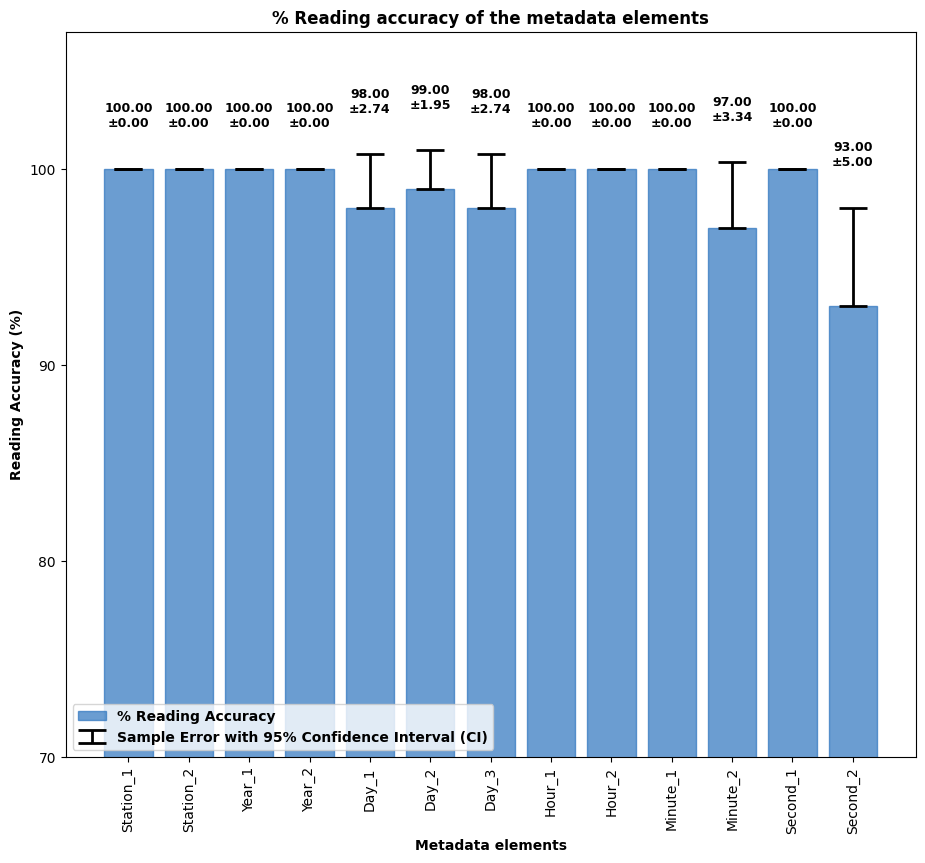

{'Station_1': 100,
 'Station_2': 100,
 'Year_1': 100,
 'Year_2': 100,
 'Day_1': 98,
 'Day_2': 99,
 'Day_3': 98,
 'Hour_1': 100,
 'Hour_2': 100,
 'Minute_1': 100,
 'Minute_2': 97,
 'Second_1': 100,
 'Second_2': 93}

In [10]:
#running analysis on final batch of ISIS A
analyze_batch('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Single_Vals.csv')

### Overall summary of ISIS A Ionograms

Total number of scanned ISIS A ionograms: 308077
Number of ISIS A Images manually analyzed: 100
Number of ionograms categorized correctly out of 100: 87
Estimated success rate out of 400647 ionograms with consistent results: 0.87
Sample error: 0.06
Confidence interval: 2.02


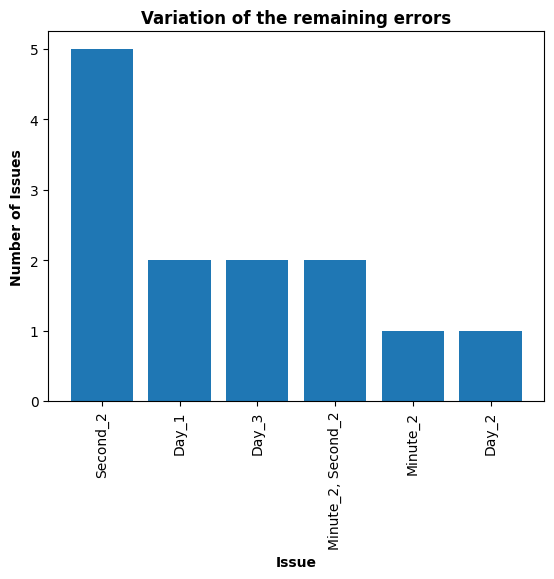

In [13]:
#Total Number of Num Categories
print ('Total number of scanned ISIS A ionograms:', len(df_master_ISIS_1))

#Total number of Ionograms analyzed
df_num = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_A_Accuracy_QA_Time_Quality_Single_Vals.csv')
total_len = len(df_num)
print ('Number of ISIS A Images manually analyzed:', total_len)

#Filtering out correct categories
df_num['Issue'] = df_num['Issue'].astype(str)
df_num = df_num.loc[df_num['Issue'] != 'nan']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly out of 100:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*len(df_master_ISIS_1))
print('Estimated success rate out of 400647 ionograms with consistent results:', round(Estimation/len(df_master_ISIS_1),2))

confidence_interval = 0.95
z_score = 1.96
p = Estimation/len(df_master_ISIS_1)
sample_error = round(np.sqrt(p*(1-p)/len(df_master_ISIS_1))*100,2)
confidence_interval = z_score + sample_error
    
print("Sample error:", sample_error)
print("Confidence interval:", confidence_interval)


#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation of the remaining errors",fontweight = 'bold')
plt.xlabel("Issue",fontweight = 'bold')
plt.ylabel("Number of Issues",fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()


## ISIS B Ionograms
We now repeat the same process with ISIS B Ionograms.

In [132]:
df_master_ISIS_2 = pd.read_csv(logDir + 'ISIS-2_MD_Version6.csv', low_memory= False)

In [25]:
results_file_B = df_master_ISIS_2.loc[df_master_ISIS_2['Time_quality'].isin(time_quality)]

In [147]:
#first sample of 50 ionograms
selected_rows_num_B = results_file_B.sample(sample_size)
selected_rows_num_B.head(5)

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
124252,NaN,4,1972,335,7,6,24,Image0377.png,b14_R014207878,B1-35-24 ISIS B D-696,...,4,43,1,"Resolute Bay, Canada",RES,43,74.41,265.07,74.7N,95W
310199,NaN,6,1972,183,14,14,27,Image0067.png,R014207777,B1-35-30 ISIS B D-1036,...,4,5,1,"Quito, Ecuador",QUI,5,-0.37,281.25,0.6S,78.6W
324110,NaN,2,1971,315,12,29,13,Image33.png,R014207779,B1-35-25 ISIS B D-731,...,4,16,1,"Johannesburg, South Africa",BUR,16,-25.52,27.42,25.9S,27.7E
73123,NaN,7,1973,0,1,59,45,Image0462.png,b9_R014207778,B1-35-28 ISIS B D-901,...,4,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
264084,NaN,4,1972,72,18,59,39,Image0359.png,b14_R014207878,B1-35-24 ISIS B D-675,...,4,21,1,"Orroral, Australia",ORR,21,-35.37,148.57,35.6S,149E


In [29]:
#additional sample of 50 
second_sample_B = results_file_B.sample(sample_size)
second_sample_B.head(5)

,Outlier,Fixed_Frequency_Code,Year,Day,Hour,Minute,Second,Filename,Directory,Subdirectory,...,Adjusted_Satellite_Code,Adjusted_Station_Number,Station_quality,Station_Location_y,Station_ID_y,Number,Station_Latitude,Station_Longitude,Latitude,Longitude
67609,NaN,4,1973,150,11,10,56,Image0149.png,b9_R014207778,B1-35-28 ISIS B D-889,...,4,50,1,"Ottawa, Canada",OTT,50,45.21,284.07,45.4N,75.7W
297216,NaN,1,1971,248,11,0,51,Image0427.png,R014207776,B1-35-22 ISIS B D-559,...,4,5,1,"Quito, Ecuador",QUI,5,-0.37,281.25,0.6S,78.6W
125804,NaN,0,1972,346,0,39,10,Image0284.png,b14_R014207878,B1-35-24 ISIS B D-700,...,4,43,1,"Resolute Bay, Canada",RES,43,74.41,265.07,74.7N,95W
218603,NaN,0,1972,351,5,47,58,Image0160.png,R014207777,B1-35-30 ISIS B D-1062,...,4,19,1,"Fairbanks, Alaska",ULA,19,64.58,212.29,64.9N,147.8W
257180,NaN,5,1971,219,23,23,8,Image0351.png,b14_R014207878,B1-35-24 ISIS B D-657,...,4,21,1,"Orroral, Australia",ORR,21,-35.37,148.57,35.6S,149E


In [138]:
for _, row in selected_rows_num_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)

    if os.path.exists(image_path1):
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):
        image = Image.open(image_path3)
        image.show()

    else: 
        print ("Image not found")
    

In [32]:
for _, row in second_sample_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']
    image_path1 = os.path.join(imageDir1, directory, subdirectory, filename)
    image_path2 = os.path.join(imageDir2, directory, subdirectory, filename)
    image_path3 = os.path.join(imageDir3, directory, subdirectory, filename)
    
    if os.path.exists(image_path1):
        print ("Image Path:", image_path1)
        image = Image.open(image_path1)
        image.show()
    
    elif os.path.exists(image_path2):
        print ("Image Path:", image_path2)
        image = Image.open(image_path2)
        image.show()
    
    elif os.path.exists(image_path3):        
        print ("Image Path:", image_path3)
        image = Image.open(image_path3)
        image.show()
    else: 
        print ("Image not found")

Image Path: L:/DATA/ISIS/ISIS_101300030772/b9_R014207778\B1-35-28 ISIS B D-889\Image0149.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207776\B1-35-22 ISIS B D-559\Image0427.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b14_R014207878\B1-35-24 ISIS B D-700\Image0284.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207777\B1-35-30 ISIS B D-1062\Image0160.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b14_R014207878\B1-35-24 ISIS B D-657\Image0351.png
Image Path: L:/DATA/ISIS/raw_upload_20230421/R014207767\B1-35-26 ISIS B D-792\Image0492.png
Image Path: L:/DATA/ISIS/raw_upload_20230421/R014207779\B1-35-25 ISIS B D-726\Image0637.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207776\B1-35-22 ISIS B D-579\Image0204.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207776\B1-35-22 ISIS B D-550\Image0082.png
Image Path: L:/DATA/ISIS/ISIS_102000056114/R014207777\B1-35-30 ISIS B D-1019\Image0260.png
Image Path: L:/DATA/ISIS/ISIS_101300030772/b3_R014207773\B1-35-31 ISIS B D-1119\Ima

In [33]:
print ("Please read the metadata for each of the 50 images above and the values in the boxes below")
print ("Write N/A if any of the values were not present or not easy to read.")

second_data = []
for _, row in second_sample_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['Filename']  

    Station_Number = input ("Station number: ")
    Year = input ("Add the Year: ")
    Day = input ("Add the Day: ")
    Hour = input ("Add the Hour: ")
    Minute = input ("Add the Minutes: ")
    Second = input ("Add the Seconds: ")
    Issue = ''

    if str(row['Year'])[2:4] != Year:
        Issue = 'Year'
    if row['Day'] != int(Day):
        Issue = Issue + ', Day'
    if row['Minute'] !=  int(Minute):
        Issue = Issue + ', Minute'
    if row['Second'] != int(Second):
        Issue = Issue + ', Second'  
    if row['Adjusted_Station_Number'] != int(Station_Number):
        Issue = Issue + ', Station_Number'
    
    if len(Issue) == 0:
        Issue = 'None'
    second_data.append([directory, subdirectory, filename, Station_Number, Year, Day, Hour, Minute, Second, Issue])
    
with open ('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Filtered.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "Filename","Station_Number","Year", "Day",  "Hour", "Minute", "Second", "Issue"])
    for row in second_data:
        writer.writerow(row)

Please read the metadata for each of the 50 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.


In [125]:
my_analysis_B = pd.read_csv("L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Filtered.csv")
my_analysis_B

,Directory,Subdirectory,Filename,Station_Number,Year,Day,Hour,Minute,Second,Issue
0,b14_R014207878,B1-35-24 ISIS B D-696,Image0377.png,43,72,335,7,6,24,NaN
1,R014207777,B1-35-30 ISIS B D-1036,Image0067.png,5,72,183,14,14,27,NaN
2,R014207779,B1-35-25 ISIS B D-731,Image33.png,16,71,315,12,29,13,NaN
3,b9_R014207778,B1-35-28 ISIS B D-901,Image0462.png,50,73,0,1,59,45,NaN
4,b14_R014207878,B1-35-24 ISIS B D-675,Image0359.png,21,72,72,18,59,39,NaN
...,...,...,...,...,...,...,...,...,...,...
95,R014207770,B1-35-29 ISIS B D-1003,Image0650.png,19,72,232,14,27,25,NaN
96,b32_R028224177,B1-35-18 ISIS B D-295,Image0024.png,50,72,17,0,26,30,", Day"
97,b3_R014207773,B1-35-31 ISIS B D-1071,Image0163.png,19,73,19,13,40,31,NaN
98,R014207777,B1-35-30 ISIS B D-1051,Image0176.png,19,72,260,11,8,56,NaN


In [127]:
#Splitting the df into issues and no issues
my_analysis_B['Issue'] = my_analysis_B['Issue'].astype(str)
no_issues_B = my_analysis_B.loc[(my_analysis_B['Issue'] == 'nan')]
no_issues_B.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Single_Vals.csv')

In [128]:
no_issues_B

,Directory,Subdirectory,Filename,Station_Number,Year,Day,Hour,Minute,Second,Issue
0,b14_R014207878,B1-35-24 ISIS B D-696,Image0377.png,43,72,335,7,6,24,nan
1,R014207777,B1-35-30 ISIS B D-1036,Image0067.png,5,72,183,14,14,27,nan
2,R014207779,B1-35-25 ISIS B D-731,Image33.png,16,71,315,12,29,13,nan
3,b9_R014207778,B1-35-28 ISIS B D-901,Image0462.png,50,73,0,1,59,45,nan
4,b14_R014207878,B1-35-24 ISIS B D-675,Image0359.png,21,72,72,18,59,39,nan
...,...,...,...,...,...,...,...,...,...,...
94,b32_R028224177,B1-35-18 ISIS B D-296,Image0293.png,50,72,20,15,11,44,nan
95,R014207770,B1-35-29 ISIS B D-1003,Image0650.png,19,72,232,14,27,25,nan
97,b3_R014207773,B1-35-31 ISIS B D-1071,Image0163.png,19,73,19,13,40,31,nan
98,R014207777,B1-35-30 ISIS B D-1051,Image0176.png,19,72,260,11,8,56,nan


In [129]:
my_analysis_B['Issue'] = my_analysis_B['Issue'].astype(str)
issues_B = my_analysis_B.loc[(my_analysis_B['Issue'] != 'nan')]
issues_B = issues_B.reset_index(drop=True)
issues_B.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Single_Vals_Issues.csv')

In [134]:
#getting original keras values to manually compare for differences and change the csv file
for _, row in issues_B.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row['Filename']
    print(df_master_ISIS_2.loc[(df_master_ISIS_2["Directory"] == str(directory)) & (df_master_ISIS_2["Subdirectory"] == str(subdirectory)) & (df_master_ISIS_2["Filename"] == str(filename))])

       Outlier  Fixed_Frequency_Code  Year  Day  Hour  Minute  Second  \
115427     NaN                     5  1972  101     9      29      14   

             Filename       Directory           Subdirectory  ...  \
115427  Image0301.png  b11_R014207871  B1-35-20 ISIS B D-452  ...   

        Adjusted_Satellite_Code Adjusted_Station_Number  Station_quality  \
115427                        4                      43                1   

          Station_Location_y  Station_ID_y  Number Station_Latitude  \
115427  Resolute Bay, Canada           RES      43            74.41   

       Station_Longitude  Latitude  Longitude  
115427            265.07     74.7N        95W  

[1 rows x 23 columns]
     Outlier  Fixed_Frequency_Code  Year  Day  Hour  Minute  Second  \
1683     NaN                     2  1971  251     3       4       9   

           Filename       Directory           Subdirectory  ...  \
1683  Image0265.png  b11_R014207871  B1-35-20 ISIS B D-413  ...   

      Adjusted_Satell

In [135]:
#splitting values into single digits. e.g. Year becomes Year_1 and Year_2
filtered_B = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Single_Vals.csv')

filtered_B = filtered_B.reset_index(drop=True)
for int in range(len(filtered_B)):
    filtered_B.loc[int, "Year_1"] = str(filtered_B.loc[int, "Year"])[0]
    filtered_B.loc[int, "Year_2"] = str(filtered_B.loc[int, "Year"])[1]
    filtered_B = filtered_B.reset_index(drop=True)
    
for int in range(len(filtered_B)):
    pos =  str(filtered_B.loc[int, "Day"])
    if len(pos) == 3:
        filtered_B.loc[int, 'Day_1'] = pos[0]
        filtered_B.loc[int, 'Day_2'] = pos[1]
        filtered_B.loc[int, 'Day_3'] = pos[2]

    elif len(pos) == 2:
        filtered_B.loc[int, 'Day_1'] = '0'
        filtered_B.loc[int, 'Day_2'] = pos[0]
        filtered_B.loc[int, 'Day_3'] = pos[1]
    else:
        filtered_B.loc[int, 'Day_1'] = '0'
        filtered_B.loc[int, 'Day_2'] = '0'
        filtered_B.loc[int, 'Day_3'] = pos[0]

filtered_B = filtered_B.reset_index(drop=True)
for int in range(len(filtered_B)):
    pos =  str(filtered_B.loc[int, "Hour"])
    if len(pos) == 2:
        filtered_B.loc[int, 'Hour_1'] = pos[0]
        filtered_B.loc[int, 'Hour_2'] = pos[1]

    else:
        filtered_B.loc[int, 'Hour_1'] = '0'
        filtered_B.loc[int, 'Hour_2'] = pos[0]

filtered_B = filtered_B.reset_index(drop=True)
for int in range(len(filtered_B)):
    pos =  str(filtered_B.loc[int, "Minute"])
    if len(pos) == 2:
        filtered_B.loc[int, 'Minute_1'] = pos[0]
        filtered_B.loc[int, 'Minute_2'] = pos[1]

    else:
        filtered_B.loc[int, 'Minute_1'] = '0'
        filtered_B.loc[int, 'Minute_2'] = pos[0]
        
filtered_B = filtered_B.reset_index(drop=True)
for int in range(len(filtered_B)):
    pos =  str(filtered_B.loc[int, "Second"])
    if len(pos) == 2:
        filtered_B.loc[int, 'Second_1'] = pos[0]
        filtered_B.loc[int, 'Second_2'] = pos[1]

    else:
        filtered_B.loc[int, 'Second_1'] = '0'
        filtered_B.loc[int, 'Second_2'] = pos[0]

filtered_B = filtered_B.reset_index(drop=True)
for int in range(len(filtered_B)):
    pos =  str(filtered_B.loc[int, "Station_Number"])
    if len(pos) == 2:
        filtered_B.loc[int, 'Station_1'] = pos[0]
        filtered_B.loc[int, 'Station_2'] = pos[1]

    else:
        filtered_B.loc[int, 'Station_1'] = '0'
        filtered_B.loc[int, 'Station_2'] = pos[0]

filtered_B.to_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Single_Vals.csv')


Element Analysis:
Number of "Station_1" element categorized correctly: 100
Percent reading accuracy of the "Station_1" element: 100.00%
Sample Error for "Station_1" element: 0.00
Confidence Interval for the "Station_1" element: 0.00
Number of "Station_2" element categorized correctly: 99
Percent reading accuracy of the "Station_2" element: 99.00%
Sample Error for "Station_2" element: 0.99
Confidence Interval for the "Station_2" element: 1.95
Number of "Year_1" element categorized correctly: 100
Percent reading accuracy of the "Year_1" element: 100.00%
Sample Error for "Year_1" element: 0.00
Confidence Interval for the "Year_1" element: 0.00
Number of "Year_2" element categorized correctly: 100
Percent reading accuracy of the "Year_2" element: 100.00%
Sample Error for "Year_2" element: 0.00
Confidence Interval for the "Year_2" element: 0.00
Number of "Day_1" element categorized correctly: 100
Percent reading accuracy of the "Day_1" element: 100.00%
Sample Error for "Day_1" element: 0.00

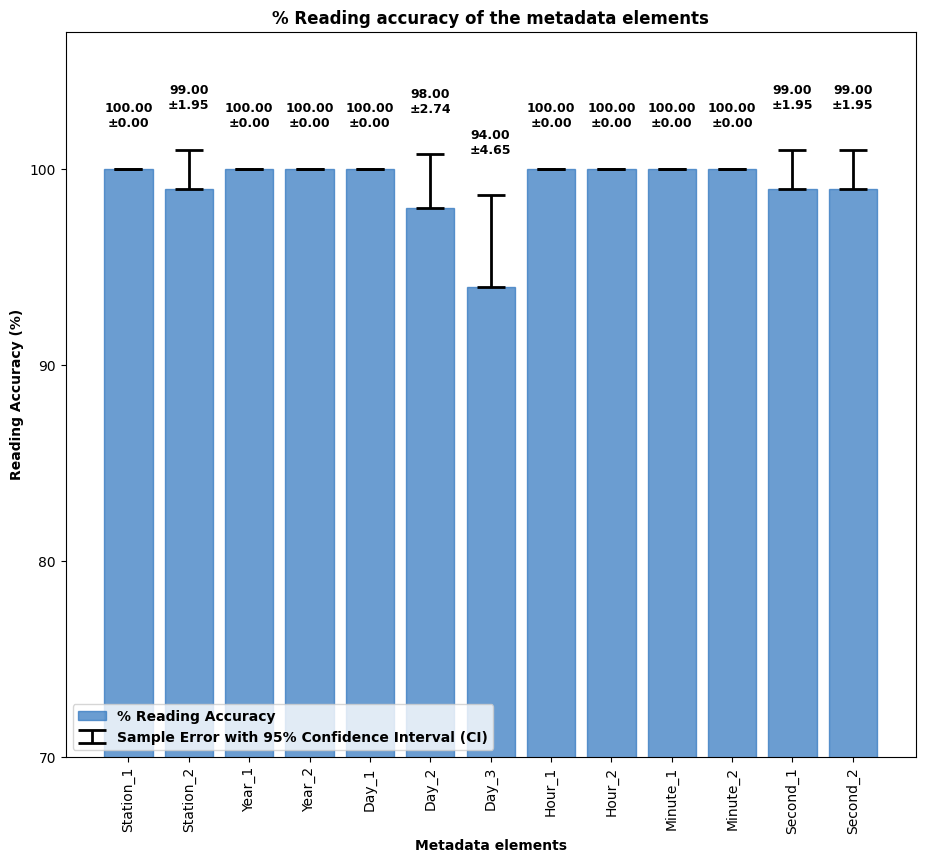

{'Station_1': 100,
 'Station_2': 99,
 'Year_1': 100,
 'Year_2': 100,
 'Day_1': 100,
 'Day_2': 98,
 'Day_3': 94,
 'Hour_1': 100,
 'Hour_2': 100,
 'Minute_1': 100,
 'Minute_2': 100,
 'Second_1': 99,
 'Second_2': 99}

In [136]:
analyze_batch('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Single_Vals.csv')

### Overall summary of ISIS B Ionograms

Total number of scanned ISIS B ionograms: 326715
Number of ISIS B Images manually analyzed: 100
Number of ionograms categorized correctly out of 100: 94
Estimated success rate out of 400647 ionograms with consistent results: 0.94
Sample error: 0.04
Confidence interval: 2.0


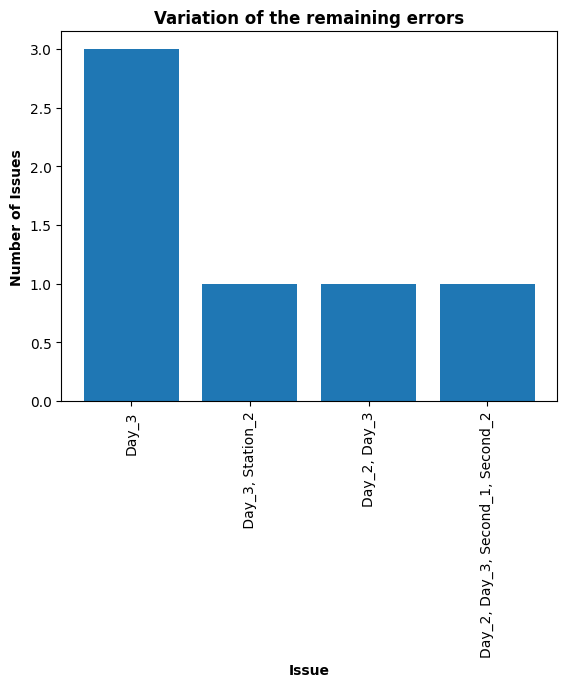

In [137]:
#Total Number of Num Categories
print ('Total number of scanned ISIS B ionograms:', len(df_master_ISIS_2))

#Total number of Ionograms analyzed
df_num = pd.read_csv('L:/DATA/ISIS/ISIS_Test_Metadata_Analysis/ISIS_B_Accuracy_QA_Time_Quality_Single_Vals.csv')
total_len = len(df_num)
print ('Number of ISIS B Images manually analyzed:', total_len)

#Filtering out correct categories
df_num['Issue'] = df_num['Issue'].astype(str)
df_num = df_num.loc[df_num['Issue'] != 'nan']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly out of 100:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*len(df_master_ISIS_2))
print('Estimated success rate out of 400647 ionograms with consistent results:', round(Estimation/len(df_master_ISIS_2),2))

confidence_interval = 0.95
z_score = 1.96
p = Estimation/len(df_master_ISIS_2)
sample_error = round(np.sqrt(p*(1-p)/len(df_master_ISIS_2))*100,2)
confidence_interval = z_score + sample_error
    
print("Sample error:", sample_error)
print("Confidence interval:", confidence_interval)


#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation of the remaining errors",fontweight = 'bold')
plt.xlabel("Issue",fontweight = 'bold')
plt.ylabel("Number of Issues",fontweight = 'bold')
plt.xticks(rotation=90)
plt.show()